## Observations and Insights

- There is a strong negative correlation between Temperature and Latitude in Northern Hemisphere. 

- There is a strong positive correlation between Temperature and Latitude in Southern Hemisphere. 

- There is a very low correlation between Latitude and other elements in DataFrame such as humidity, wind speed and cloudiness at Southern and Northern Hemisphere. 

- By looking at scatter plots, hardly we can say there is any relationship between Latitude and other elements in DataFrame such as humidity, wind speed and cloudiness.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import requests
import random
from citipy import citipy
from api_keys import weather_api_key
from pprint import pprint
from scipy.stats import linregress

random.seed(42)

In [2]:
# set up lists to hold reponse info
lat = []
lon = []
cities = []

# Loop through the list of lat, lon and cities and perform a request for data on each
for i in range(0,643):
    lat.append(random.uniform(-90, 90))
    lon.append(random.uniform(-180, 180))
    cities.append(citipy.nearest_city(lat[i], lon[i]).city_name)
    
len(cities)

643

In [3]:
# Build query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# set up lists to hold reponse info
new_city = []
lats = []
lons = []
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

counter_one = 0
counter_two = 1

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities, lat, lon, max temp, humidity, cloudiness, wind_speed, countries and dates
# and perform a request for data on each

for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        max_temps.append(response["main"]["temp_max"])
        humidities.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speeds.append(response["wind"]["speed"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])

# making if condition        
        if counter_one > 48:
            counter_one = 0
            counter_two += 1
            new_city.append(city)
        else:
            counter_one += 1
            new_city.append(city)
        print(f"Processing Record {counter_one} of Set {counter_two} | {city}")
    except Exception:
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")   

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | ancud
Processing Record 3 of Set 1 | gazli
Processing Record 4 of Set 1 | college
City not found. Skipping...
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | sabha
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | isilkul
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | pudozh
Processing Record 15 of Set 1 | kolyvan
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | gobabis
Processing Record 18 of Set 1 | soligalich
Processing Record 19 of Set 1 | kajaani
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | coihaique
Processing Record 22 of Set 1 | punta arenas
Processing Record 23 of Set

Processing Record 34 of Set 4 | brownwood
Processing Record 35 of Set 4 | vaini
Processing Record 36 of Set 4 | saldanha
Processing Record 37 of Set 4 | kenai
Processing Record 38 of Set 4 | mahajanga
Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | puerto ayora
Processing Record 41 of Set 4 | kapaa
Processing Record 42 of Set 4 | hami
Processing Record 43 of Set 4 | ushuaia
Processing Record 44 of Set 4 | bluff
Processing Record 45 of Set 4 | hilo
Processing Record 46 of Set 4 | esperance
Processing Record 47 of Set 4 | ciamis
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | butaritari
Processing Record 0 of Set 5 | ostrovnoy
City not found. Skipping...
Processing Record 1 of Set 5 | enkoping
Processing Record 2 of Set 5 | kayerkan
Processing Record 3 of Set 5 | san cristobal
City not found. Skipping...
Processing Record 4 of Set 5 | mullheim
Processing Record 5 of Set 5 | jovellanos
Processing Record 6 of Set 5 | ushuaia
Process

City not found. Skipping...
Processing Record 26 of Set 8 | hermanus
Processing Record 27 of Set 8 | san policarpo
City not found. Skipping...
Processing Record 28 of Set 8 | bonthe
Processing Record 29 of Set 8 | ribeira grande
Processing Record 30 of Set 8 | lompoc
Processing Record 31 of Set 8 | lata
Processing Record 32 of Set 8 | bambous virieux
City not found. Skipping...
Processing Record 33 of Set 8 | namtsy
Processing Record 34 of Set 8 | tupiza
Processing Record 35 of Set 8 | hami
Processing Record 36 of Set 8 | nome
Processing Record 37 of Set 8 | port alfred
Processing Record 38 of Set 8 | leningradskiy
Processing Record 39 of Set 8 | praia da vitoria
Processing Record 40 of Set 8 | port alfred
City not found. Skipping...
Processing Record 41 of Set 8 | hasaki
Processing Record 42 of Set 8 | albany
Processing Record 43 of Set 8 | cidreira
Processing Record 44 of Set 8 | hermanus
Processing Record 45 of Set 8 | kampong cham
Processing Record 46 of Set 8 | mataura
Processing 

Processing Record 15 of Set 12 | nishihara
Processing Record 16 of Set 12 | san quintin
Processing Record 17 of Set 12 | ushuaia
Processing Record 18 of Set 12 | lebu
Processing Record 19 of Set 12 | hermanus
Processing Record 20 of Set 12 | jamestown
Processing Record 21 of Set 12 | albany
Processing Record 22 of Set 12 | new norfolk
Processing Record 23 of Set 12 | kholmogory
Processing Record 24 of Set 12 | monrovia
Processing Record 25 of Set 12 | rach gia
City not found. Skipping...
Processing Record 26 of Set 12 | kuyanovo
Processing Record 27 of Set 12 | jamestown
Processing Record 28 of Set 12 | mataura
Processing Record 29 of Set 12 | hobart
Processing Record 30 of Set 12 | bambous virieux
Processing Record 31 of Set 12 | san patricio
Processing Record 32 of Set 12 | arraial do cabo
Processing Record 33 of Set 12 | luanda
Processing Record 34 of Set 12 | ushuaia
Processing Record 35 of Set 12 | arraial do cabo
Processing Record 36 of Set 12 | richards bay
Processing Record 37 

In [5]:
# create dataframe 
city_weather_data = pd.DataFrame({"City":new_city,"Lat":lats,"Lng":lons,"Max Temp":max_temps,"Humidity":humidities,"Cloudiness":cloudiness,"Wind Speed":wind_speeds,"Country":countries,"Date":dates})
city_weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,80.60,78,40,13.87,US,1602588676
1,ancud,-41.87,-73.82,51.01,100,90,10.29,CL,1602588676
2,gazli,40.13,63.45,71.53,20,0,14.61,UZ,1602588676
3,college,64.86,-147.80,26.60,49,90,11.41,US,1602588677
4,cape town,-33.93,18.42,66.99,48,12,18.34,ZA,1602588644


In [6]:
# create a summary for dataframe 
city_weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,8.083763,0.594763,59.964051,72.193220,52.127119,10.361373,1.602589e+09
std,40.264746,102.177377,19.225820,18.199516,36.452995,6.740603,6.394183e+01
min,-54.800000,-175.200000,13.100000,8.000000,0.000000,0.070000,1.602588e+09
25%,-29.145000,-73.970000,46.400000,63.250000,20.000000,4.710000,1.602589e+09
50%,6.960000,7.190000,65.660000,75.000000,51.000000,9.170000,1.602589e+09
75%,42.750000,93.450000,75.335000,85.000000,90.000000,14.990000,1.602589e+09
max,78.220000,178.420000,101.950000,100.000000,100.000000,39.150000,1.602589e+09


In [23]:
# output data to csv
city_weather_data.to_csv("output_data/WeatherDataCities.csv", index=False)

In [8]:
#  Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_humidity_over_100 = city_weather_data.loc[city_weather_data["Humidity"]>100]
len(city_humidity_over_100)

0

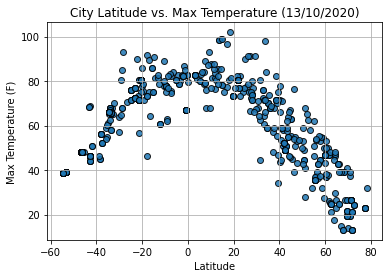

In [9]:
# Build a scatter plot for each data type
x_values = city_weather_data["Lat"]
y_values = city_weather_data["Max Temp"]

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (13/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.scatter(x_values, y_values, edgecolors="black", alpha = .85)
plt.grid()

# Save the figure
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

# Show plot
plt.show()

We can see the data follows a curve which means by increasing and decreasing latitude, temperature drops.

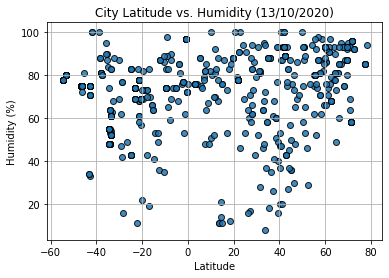

In [10]:
# Build a scatter plot for each data type
x_values = city_weather_data["Lat"]
y_values = city_weather_data["Humidity"]

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (13/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_values, y_values, edgecolors="black", alpha = .85)
plt.grid()

# Save the figure
plt.savefig("output_data/City Latitude vs. Humidity.png")

# Show plot
plt.show()

There is a low correlation and relationship between latitude and humidity.

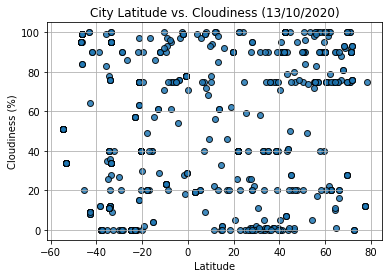

In [11]:
# Build a scatter plot for each data type
x_values = city_weather_data["Lat"]
y_values = city_weather_data["Cloudiness"]

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (13/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_values, y_values, edgecolors="black", alpha = .85)
plt.grid()

# Save the figure
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

# Show plot
plt.show()

There is not any relationship between Cloudiness and latitude, they is widely spread across the plot.

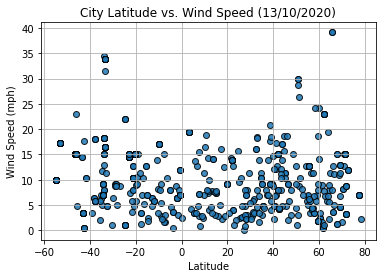

In [12]:
# Build a scatter plot for each data type
x_values = city_weather_data["Lat"]
y_values = city_weather_data["Wind Speed"]

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (13/10/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_values, y_values, edgecolors="black", alpha = .85)
plt.grid()

# Save the figure
plt.savefig("output_data/City Latitude vs. Wind Speed.png")

# Show plot
plt.show()

There is a low correlation and relationship between latitude and wind speed. Highest wind speed is at around 60 latitude.

In [13]:
# create dataframe for northern hemisphere
northern_hemisphere = city_weather_data.loc[city_weather_data["Lat"] >= 0]
northern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,80.60,78,40,13.87,US,1602588676
2,gazli,40.13,63.45,71.53,20,0,14.61,UZ,1602588676
3,college,64.86,-147.80,26.60,49,90,11.41,US,1602588677
6,sabha,27.04,14.43,91.18,17,1,2.71,LY,1602588677
8,provideniya,64.38,-173.30,29.66,90,10,2.30,RU,1602588678
...,...,...,...,...,...,...,...,...,...
576,jamestown,42.10,-79.24,52.00,93,90,14.99,US,1602588750
580,san patricio,28.02,-97.52,71.60,83,20,6.93,US,1602588684
586,sorochinsk,52.43,53.16,62.51,29,74,8.16,RU,1602588771
588,north myrtle beach,33.82,-78.68,71.60,94,90,3.36,US,1602588640


In [14]:
# create dataframe for northern hemisphere
southern_hemisphere = city_weather_data.loc[city_weather_data["Lat"] < 0]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,ancud,-41.87,-73.82,51.01,100,90,10.29,CL,1602588676
4,cape town,-33.93,18.42,66.99,48,12,18.34,ZA,1602588644
5,punta arenas,-53.15,-70.92,39.20,80,34,17.22,CL,1602588677
7,port alfred,-33.59,26.89,65.26,54,28,31.45,ZA,1602588678
10,rikitea,-23.12,-134.97,72.48,74,0,14.50,PF,1602588678
...,...,...,...,...,...,...,...,...,...
582,luanda,-8.84,13.23,82.40,65,20,9.17,AO,1602588770
583,ushuaia,-54.80,-68.30,38.86,78,51,9.95,AR,1602588680
584,arraial do cabo,-22.97,-42.03,77.00,69,57,14.99,BR,1602588689
585,richards bay,-28.78,32.04,85.06,42,0,8.70,ZA,1602588771


The r-squared is: 0.8075286904050193
The r-value is: -0.898626001407159


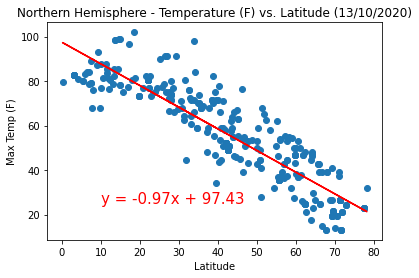

In [15]:
# Build a scatter plot for each data type
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Max Temp"]
# Perform a linear regression on temperature vs. latitude
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.title("Northern Hemisphere - Temperature (F) vs. Latitude (13/10/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
print(f"The r-value is: {rvalue}")

plt.savefig("output_data/Northern Hemisphere - Temperature (F) vs. Latitude.png")
# Show plot
plt.show()

There is a strong negative correlation between latitude and max temperature for northern hemisphere.

The r-squared is: 0.7151295816591157
The r-value is: 0.8456533460343639


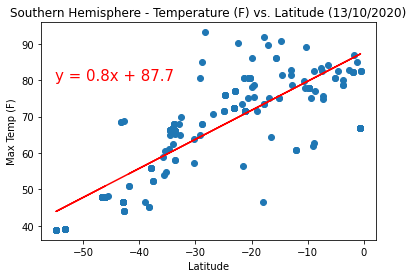

In [16]:
# Build a scatter plot for each data type
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Max Temp"]
# Perform a linear regression on temperature vs. latitude
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.title("Southern Hemisphere - Temperature (F) vs. Latitude (13/10/2020)")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern Hemisphere - Temperature (F) vs. Latitude.png")
# Show plot
plt.show()

There is a strong positive correlation between latitude and max temperature for southern hemisphere.

The r-squared is: 0.05040068836546336
The r-value is: 0.22450097631294025


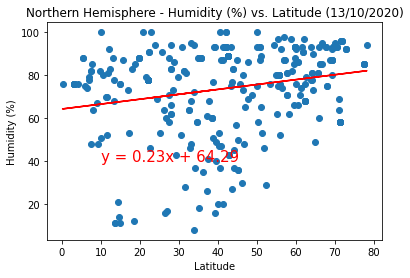

In [17]:
# Build a scatter plot for each data type
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]
# Perform a linear regression on temperature vs. latitude
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude (13/10/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern Hemisphere - Humidity (%) vs. Latitude.png")
# Show plot
plt.show()

There is a weak positive correlation between latitude and humidity for northern hemisphere.

The r-squared is: 8.310824538387723e-05
The r-value is: 0.009116372380715766


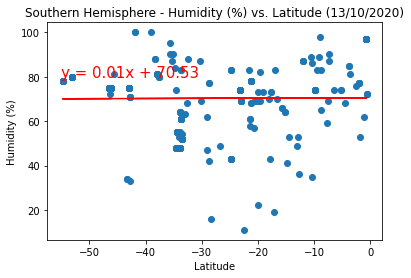

In [18]:
# Build a scatter plot for each data type
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]
# Perform a linear regression on temperature vs. latitude
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude (13/10/2020)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern Hemisphere - Humidity (%) vs. Latitude.png")
# Show plot
plt.show()

There is no correlation between latitude and humidity for southern hemisphere.

The r-squared is: 0.04479366769611956
The r-value is: 0.21164514569467346


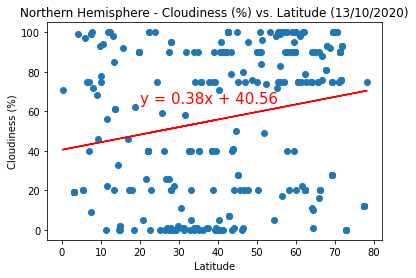

In [19]:
# Build a scatter plot for each data type
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloudiness"]
# Perform a linear regression on temperature vs. latitude
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,64),fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude (13/10/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")
# Show plot
plt.show()

There is a weak positive correlation between latitude and cloudiness for northern hemisphere.

The r-squared is: 0.0013346506997084632
The r-value is: 0.03653287149552391


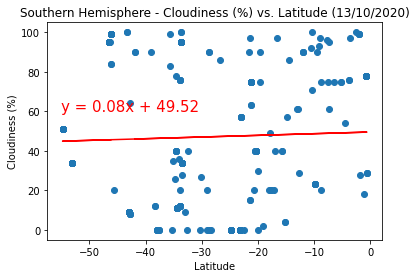

In [20]:
# Build a scatter plot for each data type
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloudiness"]
# Perform a linear regression on temperature vs. latitude
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude (13/10/2020)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")
# Show plot
plt.show()

There is no correlation between latitude and cloudiness for southern hemisphere.

The r-squared is: 0.00128601776254842
The r-value is: 0.03586108981261473


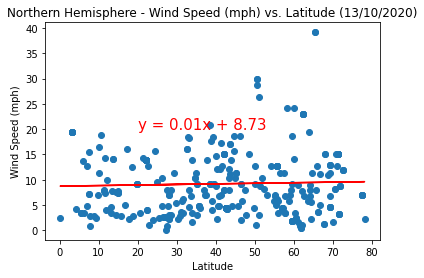

In [21]:
# Build a scatter plot for each data type
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]
# Perform a linear regression on temperature vs. latitude
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude (13/10/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")
# Show plot
plt.show()

There is no correlation between latitude and wind speed for northern hemisphere.

The r-squared is: 0.04968314689229616
The r-value is: -0.2228971666313777


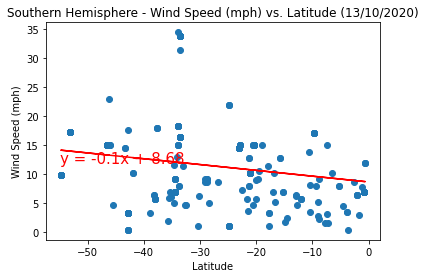

In [22]:
# Build a scatter plot for each data type
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]
# Perform a linear regression on temperature vs. latitude
# Get regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.annotate(line_eq,(-55,12),fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude (13/10/2020)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Print r square value
print(f"The r-squared is: {rvalue**2}")
print(f"The r-value is: {rvalue}")
plt.savefig("output_data/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")
# Show plot
plt.show()

There is a weak positive correlation between latitude and wind speed for southern hemisphere.